In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

In [2]:
data = pd.read_csv('tennis.csv')

In [3]:
data


,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [4]:
le_outlook = LabelEncoder()
le_temperature = LabelEncoder()
le_humidity = LabelEncoder()
le_windy = LabelEncoder()

In [5]:
data['outlook'] = le_outlook.fit_transform(data['outlook'])
data['temp'] = le_temperature.fit_transform(data['temp'])
data['humidity'] = le_humidity.fit_transform(data['humidity'])
data['windy'] = le_windy.fit_transform(data['windy'])
data['play'] = le_windy.fit_transform(data['play'])

In [6]:
data

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [7]:
X = data[['outlook', 'temp', 'humidity', 'windy']]
y = data['play']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
classify = GaussianNB()
classify.fit(X_train, y_train)

GaussianNB()

In [10]:
y_pred = classify.predict(X_test)

In [32]:
type(X_test)

pandas.core.frame.DataFrame

In [31]:
y_pred

array([1, 1, 0])

In [11]:
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [15]:
f1 = f1_score(y_pred, y_test, average="weighted")
print("F1 Score:", f1)

F1 Score: 1.0


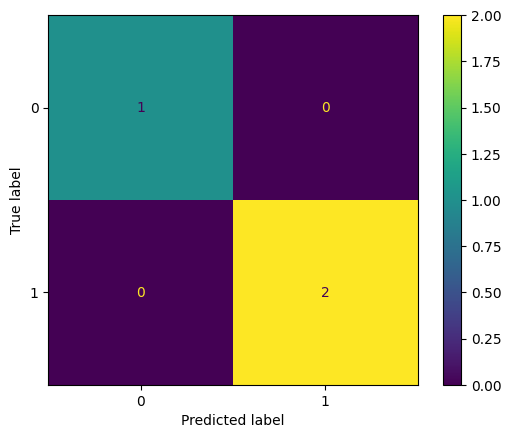

In [21]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [19]:
play_mapping = {0: 'no_play', 1: 'yes_play'}

In [20]:
play_mapping

{0: 'no_play', 1: 'yes_play'}

In [22]:
import pickle

# Save the trained model to a file
with open('naive_bayes_classify.pkl', 'wb') as file:
    pickle.dump(classify, file)

In [12]:
X_test

,outlook,temp,humidity,windy
9,1,2,1,0
11,0,2,0,1
0,2,1,0,0


In [13]:
y_test

9     1
11    1
0     0
Name: play, dtype: int32

In [14]:
y_pred

array([1, 1, 0])